In [1]:
# importing necessary libraries
from qiskit import *
from qiskit.visualization import plot_histogram

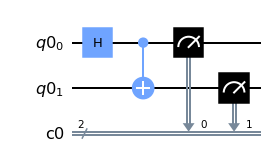

In [2]:
# Hello world program
quantum_register = QuantumRegister(2) # 2 qbits
classical_register = ClassicalRegister(2) # 2 classical bits

# creating circuit
circuit = QuantumCircuit(quantum_register, classical_register)

# adding hadamard gate to q0 qbit
circuit.h(0)

# adding CNOT gate to q0, q1
circuit.cx(0,1)

# measuring values
circuit.measure([0,1], [0,1])

# drawing circuit
circuit.draw(output = "mpl")

In [3]:
# reading api key from ibm from a file
with open("Qid.txt", "r") as handle:
    api_key = handle.read().strip()

# getting backend information
apikey = IBMQ.save_account(api_key)

configrc.store_credentials:WARNING:2021-08-07 15:25:56,263: Credentials already present. Set overwrite=True to overwrite.


In [4]:
# loading account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
# get providers
provider = IBMQ.get_provider("ibm-q")
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [6]:
# granular information of each providers
for backend in provider.backends():
    try:
        qbit_count = len(backend.properties().qubits)
    except:
        qbit_count = "simulated"
    
    print("{} : {} qubits and {} jobs".format(backend.name(), qbit_count, backend.status().pending_jobs))

ibmq_qasm_simulator : simulated qubits and 1 jobs
ibmqx2 : 5 qubits and 1 jobs
ibmq_armonk : 1 qubits and 0 jobs
ibmq_santiago : 5 qubits and 18 jobs
ibmq_bogota : 5 qubits and 6 jobs
ibmq_lima : 5 qubits and 11 jobs
ibmq_belem : 5 qubits and 6 jobs
ibmq_quito : 5 qubits and 4 jobs
simulator_statevector : simulated qubits and 2 jobs
simulator_mps : simulated qubits and 2 jobs
simulator_extended_stabilizer : simulated qubits and 1 jobs
simulator_stabilizer : simulated qubits and 1 jobs
ibmq_manila : 5 qubits and 3 jobs


In [7]:
# for our run we are going to use ibmqx2 backend from above
# this creates an instance of ibmqx2
quantum_computer = provider.get_backend("ibmqx2")

In [8]:
# executing the circuit
# since now we want to run the circuit in quantum computer this will not be quick, 
# therefore we need to moniter the condition of our job

import qiskit.tools.jupyter

# initiated job watcher
%qiskit_job_watcher

job = execute(circuit, backend = quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


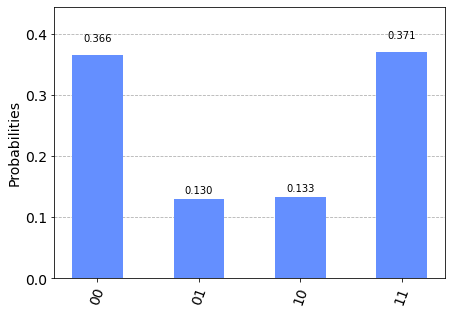

In [10]:
# store results from the run into a variable
result = job.result()

# plot histogram of the results
plot_histogram(result.get_counts(circuit))

<p>there are some values for 01 and 10 that is because of quauntum noise, we have ran the circuit in a quantum computer but in reality they are not the perfect systems there is thats why we see those quantum noises</p>

In [12]:
# disabled job watcher after the run good for memory
%qiskit_disable_job_watcher